<a href="https://colab.research.google.com/github/codingpotato/pill-detection/blob/master/pill_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup Environment

## Clone Pill Detection

In [0]:
!git clone https://github.com/codingpotato/pill-detection.git
!mkdir /content/pill-detection/generated_images
!mkdir /content/pill-detection/data

## Download Pre-Trained Model

In [0]:
!wget http://download.tensorflow.org/models/object_detection/ssdlite_mobilenet_v2_coco_2018_05_09.tar.gz

In [0]:
!tar xfv ssdlite_mobilenet_v2_coco_2018_05_09.tar.gz
!mv ssdlite_mobilenet_v2_coco_2018_05_09/model.ckpt* /content/pill-detection/data

## Install Tensorflow Object Detection API

In [0]:
!git clone https://github.com/tensorflow/models.git

In [0]:
!pip install Cython
!apt-get install protobuf-compiler
!git clone https://github.com/cocodataset/cocoapi.git
!cd cocoapi/PythonAPI; make; cp -r pycocotools /content/models/research/

In [0]:
%set_env PYTHONPATH=/content/models/research:/content/models/research/slim
%cd /content/models/research
!protoc object_detection/protos/*.proto --python_out=.

## Test Tensorflow Object Detection API

In [0]:
!python object_detection/builders/model_builder_test.py

# Prepare Images

In [0]:
from PIL import Image
from random import randint
import matplotlib.pyplot as plt

image_prefix = '/content/pill-detection/images/'
generated_image_prefix = '/content/pill-detection/generated_images/'
image_size = (300, 300)

def generate_images(name):
  for index in xrange(1, 101):
    image = Image.new('RGB', image_size, '#000')
    pill_image = Image.open(image_prefix + name + '.png')
    rotated_image = pill_image.rotate(randint(0, 359), expand=True)
    x = randint(0, image_size[0] - rotated_image.size[0])
    y = randint(0, image_size[1] - rotated_image.size[1])
    image.paste(rotated_image, (x, y))
    image.save(generated_image_prefix + name + '_' + str(index) + '.png')

generate_images('325')
generate_images('500')

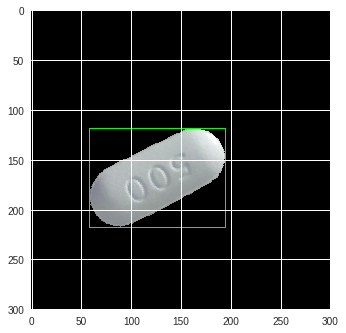

In [27]:
import cv2

image = cv2.imread(generated_image_prefix + '500_35.png')
image_bw = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, image_bw = cv2.threshold(image_bw, 1, 255, cv2.THRESH_BINARY)
_, contours, _ = cv2.findContours(image_bw, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

for cnt in contours:
  area = cv2.contourArea(cnt)
  if area > 200:
    x, y, w, h = cv2.boundingRect(cnt)
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 1)
cv2.imwrite(image_prefix + 'aa.png', image)
plt.imshow(image)

# Prepare Data

## Create Label Map

In [0]:
!echo -e " \n\
item { \n\
  id: 1 \n\
  name: '325' \n\
} \n\
\n\
item { \n\
  id: 2 \n\
  name: '500' \n\
} \
" > /content/pill-detection/data/label_map.pbtxt

# Status

In [45]:
!ls /content/pill-detection/data
!cat /content/pill-detection/data/label_map.pbtxt

label_map.pbtxt			model.ckpt.index
model.ckpt.data-00000-of-00001	model.ckpt.meta
 
item { 
  id: 1 
  name: '325' 
} 

item { 
  id: 2 
  name: '500' 
} 


In [28]:
!uptime

 06:52:09 up  1:02,  0 users,  load average: 0.00, 0.03, 0.00
